# App development for Facial Autism Recognition

## Mentored By - Dr. Sumit Srivastava
## Executed by:
1.   Kartik Tripathi, 189302052
2.   Uday Dasari, 189302090



## Data preprocessing

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,#divide each pixel by 255 ....feature scaling
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)#this is the object of the imagedatagenerator class
train_datagen

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Autism Data/train',
                                                 target_size = (64, 64),#final size of the image
                                                 batch_size = 32,
                                                 class_mode = 'binary')#mode is either categorical or binary , since we are predicting b/w two values we can take binary
training_set

Found 2536 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)#we will not apply any changes to the test images , but will change the pixels
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Autism Data/valid',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set

Found 100 images belonging to 2 classes.


## CNN Architecture

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()#same as ann
cnn

In [ ]:
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))# we dont use the input_shape parameter in the intermediate layers
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=250, activation='relu'))# we chose more no of neurons as it is image

In [ ]:
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#since the output is binary based , we need only 1 neuron

## Training the CNN

In [ ]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}.model',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
#to save the best epoch model based on the val_loss...it is saved as .model file or as a folder in your working directory
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30, callbacks=[checkpoint])

Epoch 1/30
80/80 [==============================] - 8s 98ms/step - loss: 0.2451 - accuracy: 0.8951 - val_loss: 0.4432 - val_accuracy: 0.7900

Epoch 00001: val_accuracy improved from -inf to 0.79000, saving model to model-001.model
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/30
80/80 [==============================] - 8s 99ms/step - loss: 0.2329 - accuracy: 0.9010 - val_loss: 0.4605 - val_accuracy: 0.8300

Epoch 00002: val_accuracy improved from 0.79000 to 0.83000, saving model to model-002.model
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/30
80/80 [==============================] - 8s 99ms/step - loss: 0.2309 - accuracy: 0.9085 - val_loss: 0.5098 - val_accuracy: 0.7900

Epoch 00003: val_accuracy did not improve from 0.83000
Epoch 4/30
80/80 [==============================] - 8s 98ms/step - loss: 0.2284 - accuracy: 0.9077 - val_loss: 0.6262 - val_accuracy: 0.7300

Epoch 00004: val_accuracy did not improve from 0.83000
Epoch 5/30
80/80 [=======

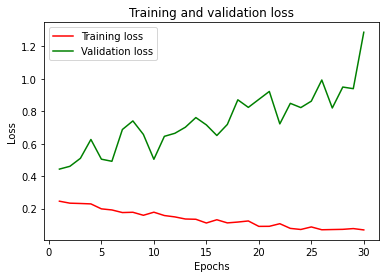

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

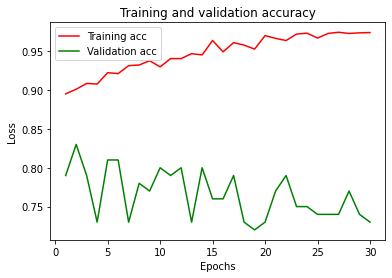

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Breaking down of video into frames

In [ ]:
import cv2
def FrameCapture(path):
    vidObj = cv2.VideoCapture(path)
    count = 0
    success = 1
    while success:
        success, image = vidObj.read()
        try:
          cv2.imwrite("frame%d.jpg" % count, image)
        except:
          pass
        count += 1
  
if __name__ == '__main__':
  FrameCapture(r"/content/drive/MyDrive/video to images test 1.mp4")

## Making a Single Prediction

In [ ]:
training_set.class_indices

{'autistic': 0, 'non_autistic': 1}

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/frame105.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
    prediction = 'non_autistic'
else:
    prediction = 'autistic'
print(prediction)

non_autistic


## Making combined prediction for the video

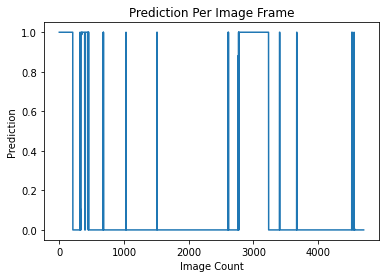

autistic
0.17168452


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from statistics import mean
result_arr = []
for i in range(4708):
  img_cnt = "/content/frame"+str(i)+".jpg"
  test_image = image.load_img(img_cnt, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  result_arr.append(result[0][0])
avg_pred = mean(result_arr)
if avg_pred >= 0.5:
    prediction = 'non_autistic'
else:
    prediction = 'autistic'
plt.plot(result_arr)
plt.xlabel('Image Count')
plt.ylabel('Prediction')
plt.title("Prediction Per Image Frame")
plt.show()
print(prediction)
print(avg_pred)

## ✈ Streamlit ✈

In [ ]:
!pip install -q streamlit
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 8501 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'
!streamlit run /content/drive/MyDrive/app.py

     |████████████████████████████████| 8.2MB 20.7MB/s 
     |████████████████████████████████| 174kB 55.3MB/s 
     |████████████████████████████████| 112kB 54.2MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 4.2MB 48.6MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 122kB 60.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
--2021-06-14 01:43:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.236.206.131, 3.83.211.184, 34.197.154.58, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.236.206.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  68.5MB/s    in 0.2s    

2021-06-14